In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import math
from matplotlib import ticker

# Plot New Transient Data: Experiment 1: Lower friction

In [17]:
Data = {'Time': [], 'SeaLevel': [], 'GroundedArea': [], 'Area':[], 'MaxHeights': [], 'Velocity': []}

for i in range(0, 477):
    dataSeaLevel     = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment1Tol6/Transient/PlotData/SeaLevel2_' + str(i) + '.csv')
    dataArea         = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment1Tol6/Transient/PlotData/Area_' + str(i) + '.csv')
    dataGroundedArea = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment1Tol6/Transient/PlotData/GroundedArea_' + str(i) + '.csv')
    dataVx           = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment1Tol6/Transient/PlotData/Vx_' + str(i) + '.csv')
    Data['Time'].append(i*25 + 2000)
    Data['SeaLevel'].append(dataSeaLevel['sea level'][10])
    Vel = dataVx['velocity:0'].tolist()
    Data['Velocity'].append(Vel[0])
    Data['GroundedArea'].append(dataGroundedArea['Area'][0])
    Data['Area'].append(dataArea['Area'][0])
    zs = dataSeaLevel['Points:2'].tolist()
    MaxHeight = 0.0
    for i in zs:
        if i > MaxHeight:
            MaxHeight = i
    Data['MaxHeights'].append(MaxHeight)

df = pd.DataFrame(data=Data)    
    
df['MaxHeights'] = df['MaxHeights']+80.0
df['AverageVelocity'] = df['Velocity']/df['Area']
df['Thickness'] = df['Area']/60000.0
df['GroundedArea'] = df['GroundedArea']/10e6

# Steady state simulations: Experiment 1: Lower Friction

In [21]:
StStData = {
    'SteadyStateTime' : [3000, 4000, 5000, 9000, 10000, 11000, 12000, 13000],
    'SteadyStateSeaLevel' : [20, 40, 60, 60, 40, 20, 0, -20],
    'SteadyStateGroundedAreas' : [],
    'SteadyStateIntegratedVelocities' : [],
    'SteadyStateIntegratedThicknesses' : [],
    'SteadyStateMaxHeights' : []
}

for i in StStData['SteadyStateTime']:
    dataGroundedArea = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment1Tol6/SteadyStates/GroundedArea' + str(i) + '.csv')
    dataIntegratedVelocities = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment1Tol6/SteadyStates/Velocity' + str(i) + '.csv')
    dataIntegratedThicknesses = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment1Tol6/SteadyStates/Area' + str(i) + '.csv')
    dataMaxHeights = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment1Tol6/SteadyStates/Height' + str(i) + '.csv')

    StStData['SteadyStateGroundedAreas'].append(dataGroundedArea['Area'][0])
    StStData['SteadyStateIntegratedVelocities'].append(dataIntegratedVelocities['velocity:0'][0])
    StStData['SteadyStateIntegratedThicknesses'].append(dataIntegratedThicknesses['Area'][0])
    
    zs = dataMaxHeights['Points:2'].tolist()
    MaxHeight = 0.0
    for j in zs:
        if j > MaxHeight:
            MaxHeight = j
    StStData['SteadyStateMaxHeights'].append(MaxHeight)

    
    
    
StStdf = pd.DataFrame(data=StStData)

StStdf['SteadyStateMaxHeights'] = StStdf['SteadyStateMaxHeights'] + 80.0
StStdf['AverageVelocity'] = StStdf['SteadyStateIntegratedVelocities']/StStdf['SteadyStateIntegratedThicknesses']
StStdf['Thickness'] = StStdf['SteadyStateIntegratedThicknesses']/60000.0
StStdf['SteadyStateGroundedAreas'] = StStdf['SteadyStateGroundedAreas']/10e6    

# Steady state simulations: Experiment 2

In [22]:
StStData2 = {
    'SteadyStateTime' : [15000, 16000, 17000, 21000, 22000, 23000, 24000, 25000],
    'SteadyStateSeaLevel' : [20, 40, 60, 60, 40, 20, 0, -20],
    'SteadyStateGroundedAreas' : [],
    'SteadyStateIntegratedVelocities' : [],
    'SteadyStateIntegratedThicknesses' : [],
    'SteadyStateMaxHeights' : []
}

for i in StStData2['SteadyStateTime']:
    dataGroundedArea = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment2Tol6/SteadyState/GroundedArea' + str(i) + '.csv')
    dataIntegratedVelocities = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment2Tol6/SteadyState/Velocity' + str(i) + '.csv')
    dataIntegratedThicknesses = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment2Tol6/SteadyState/Area' + str(i) + '.csv')
    dataMaxHeights = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment2Tol6/SteadyState/Height' + str(i) + '.csv')

    StStData2['SteadyStateGroundedAreas'].append(dataGroundedArea['Area'][0])
    StStData2['SteadyStateIntegratedVelocities'].append(dataIntegratedVelocities['velocity:0'][0])
    StStData2['SteadyStateIntegratedThicknesses'].append(dataIntegratedThicknesses['Area'][0])
    
    zs = dataMaxHeights['Points:2'].tolist()
    MaxHeight = 0.0
    for j in zs:
        if j > MaxHeight:
            MaxHeight = j
    StStData2['SteadyStateMaxHeights'].append(MaxHeight)
    
StStdf2 = pd.DataFrame(data=StStData2)

StStdf2['SteadyStateMaxHeights'] = StStdf2['SteadyStateMaxHeights'] + 80.0
StStdf2['AverageVelocity'] = StStdf2['SteadyStateIntegratedVelocities']/StStdf2['SteadyStateIntegratedThicknesses']
StStdf2['Thickness'] = StStdf2['SteadyStateIntegratedThicknesses']/60000.0
StStdf2['SteadyStateGroundedAreas'] = StStdf2['SteadyStateGroundedAreas']/10e6

# Plot New Transient Data: Experiment 2: Lower friction

In [23]:
Data2 = {'Time': [], 'SeaLevel': [], 'GroundedArea': [], 'Area':[], 'MaxHeights': [], 'Velocity': []}

for i in range(0, 477):
    dataSeaLevel     = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment2Tol6/Transient/SeaLevel_' + str(i) + '.csv')
    dataArea         = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment2Tol6/Transient/Area_' + str(i) + '.csv')
    dataGroundedArea = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment2Tol6/Transient/GroundedArea_' + str(i) + '.csv')
    dataVx           = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment2Tol6/Transient/Vx_' + str(i) + '.csv')
    Data2['Time'].append(i*25 + 14000)
    Data2['SeaLevel'].append(dataSeaLevel['sea level'][10])
    Vel = dataVx['velocity:0'].tolist()
    Data2['Velocity'].append(Vel[0])
    Data2['GroundedArea'].append(dataGroundedArea['Area'][0])
    Data2['Area'].append(dataArea['Area'][0])
    zs = dataSeaLevel['Points:2'].tolist()
    MaxHeight = 0.0
    for i in zs:
        if i > MaxHeight:
            MaxHeight = i
    Data2['MaxHeights'].append(MaxHeight)

df2 = pd.DataFrame(data=Data2)    
    
df2['MaxHeights'] = df2['MaxHeights']+80.0
df2['AverageVelocity'] = df2['Velocity']/df2['Area']
df2['Thickness'] = df2['Area']/60000.0
df2['GroundedArea'] = df2['GroundedArea']/10e6

# Plot New Transient Data: Experiment 1: Higher friction

In [24]:
Data = {'Time': [], 'SeaLevel': [], 'GroundedArea': [], 'Area':[], 'MaxHeights': [], 'Velocity': []}

for i in range(0, 477):
    dataSeaLevel     = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment1Tol6/Transient/PlotData/SeaLevel2_' + str(i) + '.csv')
    dataArea         = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment1Tol6/Transient/PlotData/Area_' + str(i) + '.csv')
    dataGroundedArea = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment1Tol6/Transient/PlotData/GroundedArea_' + str(i) + '.csv')
    dataVx           = pd.read_csv('/Users/clara.henry/Documents/Hysteresis/Experiment1Tol6/Transient/PlotData/Vx_' + str(i) + '.csv')
    Data['Time'].append(i*25 + 2000)
    Data['SeaLevel'].append(dataSeaLevel['sea level'][10])
    Vel = dataVx['velocity:0'].tolist()
    Data['Velocity'].append(Vel[0])
    Data['GroundedArea'].append(dataGroundedArea['Area'][0])
    Data['Area'].append(dataArea['Area'][0])
    zs = dataSeaLevel['Points:2'].tolist()
    MaxHeight = 0.0
    for i in zs:
        if i > MaxHeight:
            MaxHeight = i
    Data['MaxHeights'].append(MaxHeight)

df = pd.DataFrame(data=Data)    
    
df['MaxHeights'] = df['MaxHeights']+80.0
df['AverageVelocity'] = df['Velocity']/df['Area']
df['Thickness'] = df['Area']/60000.0
df['GroundedArea'] = df['GroundedArea']/10e6

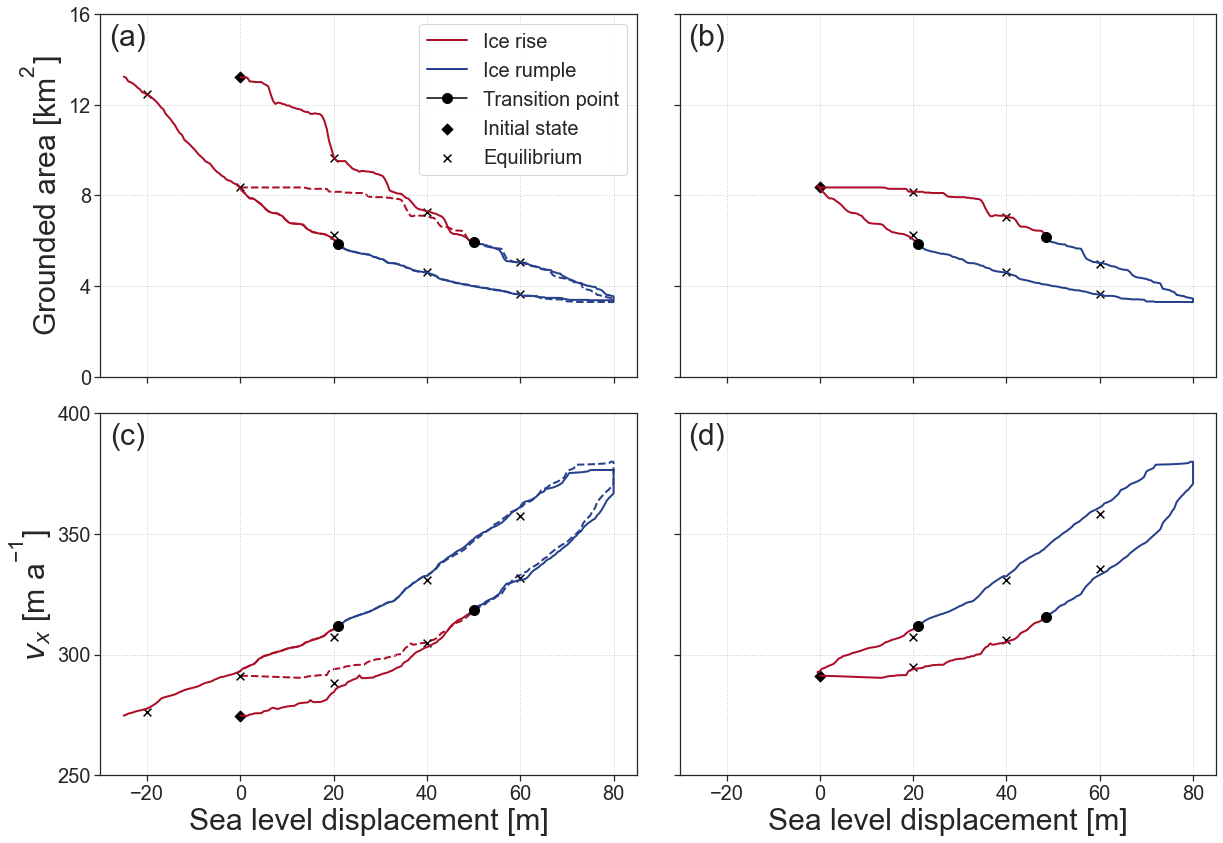

In [39]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(2, 2, figsize=(20,14), sharex='col', sharey='row')

# Dark Rise: "#ac0e28" , Rumple: "#27408B"
# Light Rise: "#ffb2b2" , Rumple: "lightblue"

# Plot (0,0)
ax[0][0].plot(df.SeaLevel[0:101], df.GroundedArea[0:101], color="#ac0e28", label="Ice rise", linewidth = 2.0)
ax[0][0].plot(df.SeaLevel[101:359], df.GroundedArea[101:359], color="#27408B", label="Ice rumple", linewidth = 2.0)
ax[0][0].plot(df.SeaLevel[359:447], df.GroundedArea[359:447], color="#ac0e28", linewidth = 2.0)
ax[0][0].scatter(df.SeaLevel[0], df.GroundedArea[0], color="black", marker='D', s=60, label='Initial state')

ax[0][0].plot(df2.SeaLevel[0:98], df2.GroundedArea[0:98], color="#ac0e28", linewidth = 2.0, zorder=0, linestyle = 'dashed')
ax[0][0].plot(df2.SeaLevel[97:360], df2.GroundedArea[97:360], color="#27408B", linewidth = 2.0, zorder=0, linestyle = 'dashed')
ax[0][0].plot(df2.SeaLevel[359:402], df2.GroundedArea[359:402], color="#ac0e28", linewidth = 2.0, zorder=0, linestyle = 'dashed')

# Plot (0,1)
ax[0][1].plot(df2.SeaLevel[0:98], df2.GroundedArea[0:98], color="#ac0e28", linewidth = 2.0)
ax[0][1].plot(df2.SeaLevel[97:360], df2.GroundedArea[97:360], color="#27408B", linewidth = 2.0)
ax[0][1].plot(df2.SeaLevel[359:402], df2.GroundedArea[359:402], color="#ac0e28", linewidth = 2.0)
ax[0][1].scatter(df2.SeaLevel[0], df2.GroundedArea[0], color="black", marker='D', s=60)

# Plot (1,0)
ax[1][0].plot(df.SeaLevel[0:101], df.AverageVelocity[0:101], color="#ac0e28", linewidth = 2.0)
ax[1][0].plot(df.SeaLevel[101:359], df.AverageVelocity[101:359], color="#27408B", linewidth = 2.0)
ax[1][0].plot(df.SeaLevel[359:447], df.AverageVelocity[359:447], color="#ac0e28", linewidth = 2.0)
ax[1][0].scatter(df.SeaLevel[0], df.AverageVelocity[0], color="black", marker='D', s=60)

ax[1][0].plot(df2.SeaLevel[0:98], df2.AverageVelocity[0:98], color="#ac0e28", linewidth = 2.0, zorder=0, linestyle = 'dashed')
ax[1][0].plot(df2.SeaLevel[97:360], df2.AverageVelocity[97:360], color="#27408B", linewidth = 2.0, zorder=0, linestyle = 'dashed')
ax[1][0].plot(df2.SeaLevel[359:402], df2.AverageVelocity[359:402], color="#ac0e28", linewidth = 2.0, zorder=0, linestyle = 'dashed')

# Plot (1,1)
ax[1][1].plot(df2.SeaLevel[0:97], df2.AverageVelocity[0:97], color="#ac0e28", linewidth = 2.0)
ax[1][1].plot(df2.SeaLevel[97:359], df2.AverageVelocity[97:359], color="#27408B", linewidth = 2.0)
ax[1][1].plot(df2.SeaLevel[359:402], df2.AverageVelocity[359:402], color="#ac0e28", linewidth = 2.0)
ax[1][1].scatter(df2.SeaLevel[0], df2.AverageVelocity[0], color="black", marker='D', s=60)

################################################################################################################

ax[0][0].plot(df.SeaLevel[100], df.GroundedArea[100], marker="o", color="black", markersize=10, label='Transition point')
ax[0][0].plot(df.SeaLevel[358], df.GroundedArea[358], marker="o", color="black", markersize=10)
ax[1][0].plot(df.SeaLevel[100], df.AverageVelocity[100], marker="o", color="black", markersize=10)
ax[1][0].plot(df.SeaLevel[358], df.AverageVelocity[358], marker="o", color="black", markersize=10)

ax[0][1].plot(df2.SeaLevel[97], df2.GroundedArea[97], marker="o", color="black", markersize=10)
ax[0][1].plot(df2.SeaLevel[358], df2.GroundedArea[358], marker="o", color="black", markersize=10)
ax[1][1].plot(df2.SeaLevel[97], df2.AverageVelocity[97], marker="o", color="black", markersize=10)
ax[1][1].plot(df2.SeaLevel[358], df2.AverageVelocity[358], marker="o", color="black", markersize=10)

ax[0][0].scatter(StStdf.SteadyStateSeaLevel, StStdf.SteadyStateGroundedAreas, marker="x", s=60, color="black", label='Equilibrium')
ax[1][0].scatter(StStdf.SteadyStateSeaLevel, StStdf.AverageVelocity, marker="x", s=60, color="black")

ax[0][1].scatter(StStdf2.SteadyStateSeaLevel[0:6], StStdf2.SteadyStateGroundedAreas[0:6], marker="x", s=60, color="black")
ax[1][1].scatter(StStdf2.SteadyStateSeaLevel[0:6], StStdf2.AverageVelocity[0:6], marker="x", s=60, color="black")

ax[1][0].set_xlabel("Sea level displacement [m]", fontsize=30)
ax[1][1].set_xlabel("Sea level displacement [m]", fontsize=30)

ax[0][0].set_ylabel("Grounded area [km$\mathregular{^{2}}$]", fontsize=30)
ax[1][0].set_ylabel("$v_x$ [m a$\mathregular{^{-1}}$]", fontsize=30)

ax[0][0].tick_params(axis="both", labelsize=20)
ax[1][0].tick_params(axis="both", labelsize=20)
ax[0][1].tick_params(axis="both", labelsize=20)
ax[1][1].tick_params(axis="both", labelsize=20)

ax[0][0].yaxis.get_offset_text().set_fontsize(24)
ax[1][0].yaxis.get_offset_text().set_fontsize(24)

ax[0][0].set_xlim(-30,85)
ax[1][1].set_xlim(-30,85)
ax[1][1].set_ylim(250,401)

ax[0][0].set_yticks(np.arange(0, 17, 4))
ax[0][0].set_ylim(0,16)

ax[1][0].set_yticks(np.arange(250, 450, 50))
ax[1][0].set_ylim(250,400)

ax[0][0].legend(fontsize=20, title_fontsize='50', scatterpoints=1)

ax[0][0].grid(linestyle=':')
ax[1][0].grid(linestyle=':')
ax[0][1].grid(linestyle=':')
ax[1][1].grid(linestyle=':')

ax[0][0].text(0.05, 0.935, '(a)', size=30, horizontalalignment='center', verticalalignment='center', transform=ax[0][0].transAxes)
ax[0][1].text(0.05, 0.935, '(b)', size=30, horizontalalignment='center', verticalalignment='center', transform=ax[0][1].transAxes)
ax[1][0].text(0.05, 0.935, '(c)', size=30, horizontalalignment='center', verticalalignment='center', transform=ax[1][0].transAxes)
ax[1][1].text(0.05, 0.935, '(d)', size=30, horizontalalignment='center', verticalalignment='center', transform=ax[1][1].transAxes)

plt.subplots_adjust(wspace=0.08, hspace=0.1)
 
fig.savefig('LowHysteresis.jpg', format='jpg', dpi=700, bbox_inches = "tight")
